### 🧭 Overview

This notebook contains tests and visual demonstrations for two lattice basis reduction algorithms:

- [**`reduce_2d_basis`**](#📐-2D-Lattice-Basis-Reduction-–-Interactive-Notebook):
  [View source](../lattice_methods/basis_reduction_2d.py)

- [**`lll_reduce`**](#📐-LLL-Algorithm:-Wikipedia-Based-Implementation-&-Tests):
  [View source](../lattice_methods/lll.py)
  Based on [Wikipedia](https://en.wikipedia.org/wiki/Lenstra–Lenstra–Lovász_lattice_basis_reduction_algorithm)

Both aim to shorten basis vectors while preserving the same lattice.
We compare their results, run randomized tests, and validate correctness through lattice checks and vector norms.

In [5]:
from tests import tests_br2d
from tests import generate_random_bases
from tests import tests_brlll
from lattice_methods import are_bases_equal_2d


sample = generate_random_bases(10, 2)
tests_br2d(sample, True);

✅ Test 1: PASSED
Initial basis: b1 = [ 33 -23], b2 = [-40 -22]
Reduced basis: b1 = [ 33 -23], b2 = [ -7 -45]
✅ Test 2: PASSED
Initial basis: b1 = [-20  29], b2 = [ 45 -12]
Reduced basis: b1 = [25 17], b2 = [-20  29]
✅ Test 3: PASSED
Initial basis: b1 = [36 23], b2 = [ 47 -43]
Reduced basis: b1 = [36 23], b2 = [ 47 -43]
✅ Test 4: PASSED
Initial basis: b1 = [-40 -43], b2 = [ 34 -19]
Reduced basis: b1 = [ 34 -19], b2 = [-40 -43]
✅ Test 5: PASSED
Initial basis: b1 = [-46 -20], b2 = [-41 -45]
Reduced basis: b1 = [  5 -25], b2 = [-46 -20]
✅ Test 6: PASSED
Initial basis: b1 = [-31 -31], b2 = [11 22]
Reduced basis: b1 = [-9 13], b2 = [20  9]
✅ Test 7: PASSED
Initial basis: b1 = [10 31], b2 = [-15  25]
Reduced basis: b1 = [25  6], b2 = [-15  25]
✅ Test 8: PASSED
Initial basis: b1 = [-31  31], b2 = [25 24]
Reduced basis: b1 = [25 24], b2 = [-31  31]
✅ Test 9: PASSED
Initial basis: b1 = [-46 -10], b2 = [13 47]
Reduced basis: b1 = [-46 -10], b2 = [13 47]
✅ Test 10: PASSED
Initial basis: b1 = [ 30 

### ✅ LLL Reduction Tests (2D)

We test whether different 2D basis reduction methods (e.g. LLL, classical) produce equivalent bases.

Bases are normalized (up to sign and order) before comparison.

Matches confirm correct lattice reduction.

In [6]:
sample = generate_random_bases(10, 2)
tests_brlll(sample, True);

✅ Test 1: PASSED
Initial basis:
  [ 25 -15]
  [15 31]
Reduced basis:
  [ 25 -15]
  [15 31]

✅ Test 2: PASSED
Initial basis:
  [35 16]
  [-30  40]
Reduced basis:
  [35 16]
  [-30  40]

✅ Test 3: PASSED
Initial basis:
  [ 22 -23]
  [-10 -28]
Reduced basis:
  [ 22 -23]
  [-10 -28]

✅ Test 4: PASSED
Initial basis:
  [-31  29]
  [-33  19]
Reduced basis:
  [ -2 -10]
  [-35   9]

✅ Test 5: PASSED
Initial basis:
  [ 49 -30]
  [21 12]
Reduced basis:
  [21 12]
  [ 28 -42]

✅ Test 6: PASSED
Initial basis:
  [-11 -40]
  [29 30]
Reduced basis:
  [ 18 -10]
  [-11 -40]

✅ Test 7: PASSED
Initial basis:
  [-15  31]
  [-19  19]
Reduced basis:
  [ -4 -12]
  [-23   7]

✅ Test 8: PASSED
Initial basis:
  [ 20 -36]
  [-33  35]
Reduced basis:
  [-13  -1]
  [  7 -37]

✅ Test 9: PASSED
Initial basis:
  [ 21 -30]
  [ 43 -23]
Reduced basis:
  [22  7]
  [ 21 -30]

✅ Test 10: PASSED
Initial basis:
  [ 22 -43]
  [ 35 -37]
Reduced basis:
  [13  6]
  [ 22 -43]


📊 10/10 tests passed.


### 🔍 LLL vs Basic 2D Reduction

This section compares a basic 2D basis reduction algorithm with the LLL method.

Both aim to shorten vectors while preserving the same lattice.
Tests check:

- Lattice equivalence
- Vector length reduction
- Differences in sign/order
- Consistency across inputs

In [7]:
basis_list = (generate_random_bases(10, 2))
test_results_br2d = tests_br2d(basis_list)
test_results_brlll = tests_brlll(basis_list)

tests_amount = 10
tests_passed = 0

for i in range(len(test_results_br2d)):
    original_b1, original_b2 = basis_list[i]

    res_2d = test_results_br2d[i]
    res_lll = test_results_brlll[i]

    b1_2d, b2_2d = res_2d["b1"], res_2d["b2"]
    b1_lll, b2_lll = res_lll["basis"]
    match = are_bases_equal_2d([b1_2d,b2_2d], [b1_lll, b2_lll])

    print(f"\n🔹 Test {i + 1}")
    print(f"   Given basis: b1 = {original_b1}, b2 = {original_b2}")

    if match:
        print("   ✅ MATCH")
        tests_passed += 1
    else:
        print("   ❌ DIFFERENT")

    print(f"   br2d  → b1 = {b1_2d}, b2 = {b2_2d}")
    print(f"   brlll → b1 = {b1_lll}, b2 = {b2_lll}")

print(f"\n📊 {tests_passed}/{tests_amount} tests passed.")


🔹 Test 1
   Given basis: b1 = [38 27], b2 = [-43  41]
   ✅ MATCH
   br2d  → b1 = [38 27], b2 = [-43  41]
   brlll → b1 = [38, 27], b2 = [-43, 41]

🔹 Test 2
   Given basis: b1 = [-48 -25], b2 = [-31 -38]
   ✅ MATCH
   br2d  → b1 = [-17  13], b2 = [-31 -38]
   brlll → b1 = [17, -13], b2 = [-31, -38]

🔹 Test 3
   Given basis: b1 = [-42 -40], b2 = [-22 -20]
   ✅ MATCH
   br2d  → b1 = [2 0], b2 = [  0 -20]
   brlll → b1 = [-2, 0], b2 = [0, 20]

🔹 Test 4
   Given basis: b1 = [ 42 -50], b2 = [ 41 -29]
   ✅ MATCH
   br2d  → b1 = [  1 -21], b2 = [40 -8]
   brlll → b1 = [-1, 21], b2 = [40, -8]

🔹 Test 5
   Given basis: b1 = [-20 -15], b2 = [ 24 -45]
   ✅ MATCH
   br2d  → b1 = [-20 -15], b2 = [ 24 -45]
   brlll → b1 = [-20, -15], b2 = [24, -45]

🔹 Test 6
   Given basis: b1 = [-16  30], b2 = [47 37]
   ✅ MATCH
   br2d  → b1 = [-16  30], b2 = [47 37]
   brlll → b1 = [-16, 30], b2 = [47, 37]

🔹 Test 7
   Given basis: b1 = [ 28 -31], b2 = [-44  32]
   ✅ MATCH
   br2d  → b1 = [-16   1], b2 = [ -4 -29

In [8]:
# basis = [
#     np.array([1, -1, 3]),
#     np.array([1,  0, 5]),
#     np.array([1,  2, 6])
# ]
#
# test_results_br2d = lll_reduce(basis)
# print(test_results_br2d)

### 🔐 NTRU Tests

---

📘 **Example Source:**
**_Applied Cryptanalysis: Breaking Ciphers in the Real World_**
**Authors:** Mark Stamp, Richard M. Low
**Chapter:** 6.7


---

This example is derived from real-world cryptographic analysis discussed in Chapter 6.7 of the book. It demonstrates core principles of NTRU encryption and its cryptanalytic implications.

In [9]:
from lattice_methods import ntru_generate_keys, ntru_encryption, ntru_decryption
from sympy import Poly, GF,symbols, ZZ

x = symbols('x')

N = 11
p = 3
q = 32


phi = [0, 0, -1, 0, 0, -1, 1, 1, 1, 0, -1]
m = [1, 1, -1, 0, 0, 0, -1, 1, 0, 0, -1]
g = [-1, 0, -1, 0, 0, 1, 0, 1, 1, 0, -1]
f = [-1, 1, 0, 0, 1, 0, -1, 0, 1, 1, -1]


poly_f = Poly(f, x)
poly_g = Poly(g, x)
poly_m = Poly(m, x)
poly_phi = Poly(phi, x)


pub_key, prv_key = ntru_generate_keys(N, p, q, poly_g, poly_f)
ciphertext = ntru_encryption(pub_key, poly_phi, poly_m)
poly_d = ntru_decryption(pub_key, prv_key, ciphertext)

[f, Fp] = prv_key
[N,p, q, h] = pub_key

poly_m = Poly(poly_m, x, domain=GF(p))


print("✉️ Original Message Polynomial:")
print(f"    m(x) = {poly_m}\n")

print("📬 Decrypted Message Polynomial:")
print(f"    m'(x) = {poly_d}")
print("=" * 80)


✉️ Original Message Polynomial:
    m(x) = Poly(x**10 + x**9 - x**8 - x**4 + x**3 - 1, x, modulus=3)

📬 Decrypted Message Polynomial:
    m'(x) = Poly(x**10 + x**9 - x**8 - x**4 + x**3 - 1, x, modulus=3)


## 🧪 Example 2
📌 _Numerical values in this example are taken directly from:_ [https://shrek.unideb.hu/~tengely/crypto/section-8.html](https://shrek.unideb.hu/~tengely/crypto/section-8.html)

---

In [10]:
x = symbols('x')

N = 7
p = 3
q = 41

#### a_0 x^n + a_1 x^n-1.....
phi = [1, -1, 0, 0, 0, 1, -1]
m = [0, -1, 0, 1, 1, -1, 1]
g = [1, 0, 1, 0, -1, -1, 0]
f = [1, 0, -1, 1, 1, 0, -1]


poly_f = Poly(f, x)
poly_g = Poly(g, x)
poly_m = Poly(m, x)
poly_phi = Poly(phi, x)

pub_key, prv_key = ntru_generate_keys(N, p, q, poly_g, poly_f)
ciphertext = ntru_encryption(pub_key, poly_phi, poly_m)
poly_d = ntru_decryption(pub_key, prv_key, ciphertext)

[f, Fp] = prv_key
[N,p, q, h] = pub_key

poly_m = Poly(poly_m, x, domain=GF(p))

print("✉️ Original Message Polynomial:")
print(f"    m(x) = {poly_m}\n")

print("📬 Decrypted Message Polynomial:")
print(f"    m'(x) = {poly_d}")
print("=" * 80)

✉️ Original Message Polynomial:
    m(x) = Poly(-x**5 + x**3 + x**2 - x + 1, x, modulus=3)

📬 Decrypted Message Polynomial:
    m'(x) = Poly(-x**5 + x**3 + x**2 - x + 1, x, modulus=3)


### 🔐 Example 3 Reference

---

📘 **Example taken from the book:**
**_Introduction to Cryptography with Coding Theory_**
**Authors:** William Trappe, Lawrence C. Washington
**Chapter:** 17
**Edition:** 2nd Edition
**Publisher:** Pearson, 2006

---

This example is derived from Chapter 17 of the textbook, which covers advanced cryptographic constructions and their mathematical foundations.

In [11]:
x = symbols('x')

N = 5
p = 3
q = 16

#### a_0 x^n + a_1 x^n-1.....
phi = [1,-1]
m = [1, -1, 1]
g = [0, 1, 0, -1, 0]
f = [1, 0, 0, 1, -1]


poly_f = Poly(f, x)
poly_g = Poly(g, x)
poly_m = Poly(m, x)
poly_phi = Poly(phi, x)

pub_key, prv_key = ntru_generate_keys(N, p, q, poly_g, poly_f)
ciphertext = ntru_encryption(pub_key, poly_phi, poly_m)
poly_d = ntru_decryption(pub_key, prv_key, ciphertext)

[f, Fp] = prv_key
[N,p, q, h] = pub_key

poly_m = Poly(poly_m, x, domain=GF(p))

print("✉️ Original Message Polynomial:")
print(f"    m(x) = {poly_m}\n")

print("📬 Decrypted Message Polynomial:")
print(f"    m'(x) = {poly_d}")
print("=" * 80)

✉️ Original Message Polynomial:
    m(x) = Poly(x**2 - x + 1, x, modulus=3)

📬 Decrypted Message Polynomial:
    m'(x) = Poly(x**2 - x + 1, x, modulus=3)


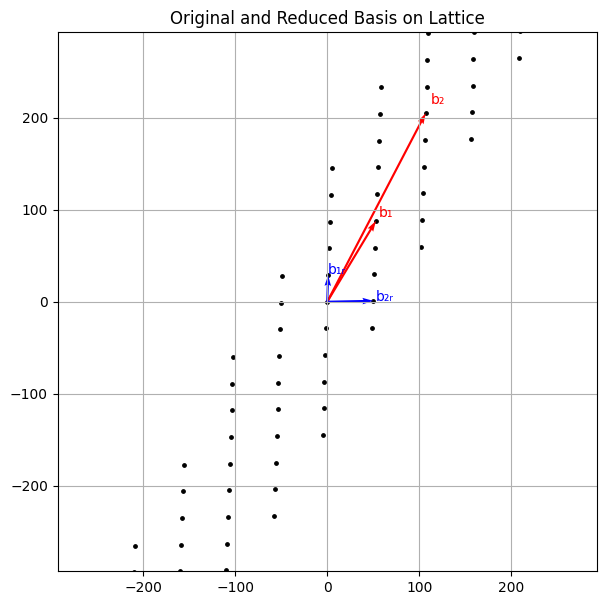

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from lattice_methods import reduce_2d_basis

def generate_fixed_lattice(b1, b2, grid_size=40):
    b1 = np.array(b1)
    b2 = np.array(b2)
    half = grid_size // 2

    points = []
    for i in range(-half, half + 1):
        for j in range(-half, half + 1):
            p = i * b1 + j * b2
            points.append(p)

    return np.array(points)


def plot_lattice_with_bases(points, b1, b2, b1_red, b2_red, zoom=0.5):
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.set_aspect('equal')
    ax.grid(True)

    ax.scatter(points[:, 0], points[:, 1], s=6, color='black')

    ax.quiver(0, 0, *b1, angles='xy', scale_units='xy', scale=1, color='red', width=0.004)
    ax.quiver(0, 0, *b2, angles='xy', scale_units='xy', scale=1, color='red', width=0.004)
    ax.text(*(np.array(b1) * 1.05), "b₁", color='red')
    ax.text(*(np.array(b2) * 1.05), "b₂", color='red')

    ax.quiver(0, 0, *b1_red, angles='xy', scale_units='xy', scale=1, color='blue', width=0.004)
    ax.quiver(0, 0, *b2_red, angles='xy', scale_units='xy', scale=1, color='blue', width=0.004)
    ax.text(*(np.array(b1_red) * 1.05), "b₁ᵣ", color='blue')
    ax.text(*(np.array(b2_red) * 1.05), "b₂ᵣ", color='blue')

    # Зум
    x_min, x_max = points[:, 0].min(), points[:, 0].max()
    y_min, y_max = points[:, 1].min(), points[:, 1].max()
    x_center = (x_min + x_max) / 2
    y_center = (y_min + y_max) / 2
    span = max(x_max - x_min, y_max - y_min)
    zoomed_span = span * zoom

    ax.set_xlim(x_center - zoomed_span / 2, x_center + zoomed_span / 2)
    ax.set_ylim(y_center - zoomed_span / 2, y_center + zoomed_span / 2)

    ax.set_title("Original and Reduced Basis on Lattice")
    plt.show()




b1 = np.array([53, 88])
b2 = np.array([107, 205])
points = generate_fixed_lattice(b1, b2, grid_size=20)
b1_red, b2_red = reduce_2d_basis(b1, b2)

plot_lattice_with_bases(points, b1, b2, b1_red, b2_red, zoom=0.1)